In [19]:
from sklearn.datasets import load_boston # para carregar os dados
from sklearn.model_selection import train_test_split #importação para separar treino e teste
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.metrics import mean_squared_error #métrica de erro

import matplotlib.pyplot as plt #importa biblioteca de graficos
import statsmodels.api as sm #importa biblioteca de estatística

# carrega os dados
house_data = load_boston()
X = house_data['data'] #separação dos dados que representam as features
y = house_data['target'] #separação da variável target

In [20]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [21]:
print(house_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Estatisticas Descritiva de y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 30 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        00:51:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595  

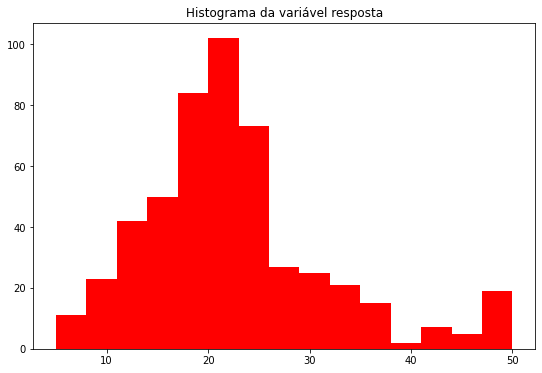

In [22]:
#Estatística Descritiva do Modelo
print("Estatisticas Descritiva de y")
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
results = sm.OLS(y, X_sm).fit() #executa o modelo de estatistica OLS em todo o conjunto de dados.



# mostrando as estatísticas do modelo
print(results.summary())

#gráfico de histograma da variável resposta

figure=plt.figure(figsize=(9,6))
plt.hist(y,color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

In [23]:
#O passo seguinte é separar os dados em conjunto de teste e de treino (algoritmo supervisionado).
#Esta divisão ocorre de modo aleatório.
#Posteriormente, é criada a variável regr, responsável por criar o modelo de regressão linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30) #separa o treino do teste
regr = LinearRegression() # cria o modelo de regressão linear
regr.fit(X_train, y_train) # função de treino do modelo de regressão  linear


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Histograma dos residuos da regressão')

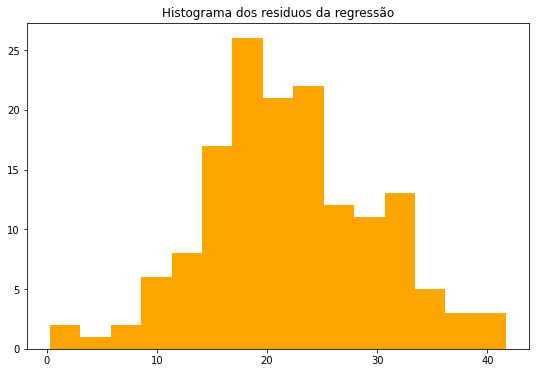

In [24]:
y_predict= regr.predict(X_test) #executa no modelo criado de regressão linear o teste

#histograma dos resíduso do teste
figure=plt.figure(figsize=(9,6))
res= y_test=y_predict #realiza a comaração entre o y atual e o predito
plt.hist(res,color='orange',bins=15)
plt.title('Histograma dos residuos da regressão')


In [25]:
#Após o modelo ser treinado e a visualização dos resíduos, é possível realizar previsões e comparar com os rótulos reais.
#Para isso, será utilizado o Coeficiente de Determinação (R^2), para mostrar o quanto da variação nos preços (variável y) é explicada pelo modelo. 

r2_train = regr.score(X_train, y_train) #calcula o score do treino
r2_test = regr.score(X_test, y_test)#calcula o score do teste

print('R^2 no set de treino: %.4f' % r2_train)
print('R^2 no set de teste: %.4f' % r2_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('Mean squared error: %.6f' % mean_squared_error(y_test, y_pred))

R^2 no set de treino: 0.7480
R^2 no set de teste: 1.0000
Mean squared error: 0.000000
